# Online Product Sales
Lien : https://www.kaggle.com/competitions/online-sales/data


## I - Introduction:

Dans ce compte rendue qui suit .Notre objectif est de créer une solution d'apprentissage automatique pour prédire les produits de ventes en lignes. Selon les données obtenue dans la site "kaggle". On va tout d'abord procéder au exploratoire data analysis afin de bien vizualiser nos donnéres . Puis passons aux enttraînement d'un modèle .  



Mais avant de commencer importons tout les bibliothèque nécéssaire et aussi le fichier contenant notre code et données , nécéssaire pour la suite de notre travail.


In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")

## Objectifs :

L'objectif principal de ce projet consiste à élaborer le modèle le plus performant possible pour anticiper les ventes mensuelles en ligne d'un produit donné. Pour atteindre cet objectif, l'utilisation d'un modèle de machine learning s'avère indispensable.








## Importations et analyse des données:

In [238]:
train = pd.read_csv("TrainingDataset.csv")
test = pd.read_csv("TestDataset.csv")

In [239]:
train.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Cat_1,Date_1,Quan_1,Quan_2,Quan_3,Quan_4,Date_2,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quan_10,Quan_11,Quan_12,Quan_13,Quan_14,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_15,Cat_16,Quan_15,Cat_17,Cat_18,Cat_19,Cat_20,Cat_21,Cat_22,Cat_23,Cat_24,Cat_25,Cat_26,Cat_27,Cat_28,Cat_29,Cat_30,Cat_31,Cat_32,Cat_33,Cat_34,Cat_35,Cat_36,Cat_37,Cat_38,Cat_39,Cat_40,Cat_41,Cat_42,Cat_43,Cat_44,Cat_45,Cat_46,Cat_47,Cat_48,Cat_49,Cat_50,Cat_51,Cat_52,Cat_53,Cat_54,Cat_55,Cat_56,Cat_57,Cat_58,Cat_59,Cat_60,Cat_61,Cat_62,Cat_63,Cat_64,Cat_65,Cat_66,Cat_67,Cat_68,Cat_69,Cat_70,Cat_71,Cat_72,Cat_73,Cat_74,Cat_75,Cat_76,Cat_77,Cat_78,Cat_79,Cat_80,Cat_81,Cat_82,Cat_83,Cat_84,Cat_85,Cat_86,Cat_87,Cat_88,Cat_89,Cat_90,Cat_91,Cat_92,Cat_93,Cat_94,Cat_95,Cat_96,Cat_97,Cat_98,Cat_99,Cat_100,Cat_101,Cat_102,Cat_103,Cat_104,Cat_105,Cat_106,Cat_107,Cat_108,Cat_109,Quan_16,Quan_17,Quan_18,Cat_110,Cat_111,Cat_112,Cat_113,Cat_114,Cat_115,Cat_116,Cat_117,Cat_118,Cat_119,Cat_120,Cat_121,Cat_122,Cat_123,Cat_124,Cat_125,Cat_126,Cat_127,Cat_128,Cat_129,Cat_130,Cat_131,Cat_132,Cat_133,Cat_134,Cat_135,Cat_136,Cat_137,Cat_138,Cat_139,Cat_140,Cat_141,Cat_142,Cat_143,Cat_144,Cat_145,Cat_146,Cat_147,Cat_148,Cat_149,Cat_150,Cat_151,Cat_152,Cat_153,Cat_154,Cat_155,Cat_156,Cat_157,Cat_158,Cat_159,Cat_160,Cat_161,Cat_162,Cat_163,Cat_164,Cat_165,Cat_166,Cat_167,Cat_168,Cat_169,Cat_170,Cat_171,Cat_172,Cat_173,Cat_174,Cat_175,Cat_176,Cat_177,Cat_178,Cat_179,Cat_180,Cat_181,Cat_182,Cat_183,Cat_184,Cat_185,Cat_186,Cat_187,Cat_188,Cat_189,Cat_190,Cat_191,Cat_192,Cat_193,Cat_194,Cat_195,Cat_196,Cat_197,Cat_198,Cat_199,Cat_200,Cat_201,Cat_202,Cat_203,Cat_204,Cat_205,Cat_206,Cat_207,Cat_208,Cat_209,Cat_210,Cat_211,Cat_212,Cat_213,Cat_214,Cat_215,Cat_216,Cat_217,Cat_218,Cat_219,Cat_220,Cat_221,Cat_222,Cat_223,Cat_224,Cat_225,Cat_226,Cat_227,Cat_228,Cat_229,Cat_230,Cat_231,Cat_232,Cat_233,Cat_234,Cat_235,Cat_236,Cat_237,Cat_238,Cat_239,Cat_240,Cat_241,Cat_242,Cat_243,Cat_244,Cat_245,Cat_246,Cat_247,Cat_248,Cat_249,Cat_250,Cat_251,Cat_252,Cat_253,Cat_254,Cat_255,Cat_256,Cat_257,Cat_258,Cat_259,Cat_260,Cat_261,Cat_262,Cat_263,Cat_264,Cat_265,Cat_266,Cat_267,Cat_268,Cat_269,Cat_270,Cat_271,Cat_272,Cat_273,Cat_274,Cat_275,Cat_276,Cat_277,Cat_278,Cat_279,Cat_280,Cat_281,Cat_282,Cat_283,Cat_284,Cat_285,Cat_286,Cat_287,Cat_288,Cat_289,Cat_290,Cat_291,Cat_292,Cat_293,Cat_294,Cat_295,Cat_296,Cat_297,Cat_298,Cat_299,Cat_300,Cat_301,Cat_302,Cat_303,Cat_304,Cat_305,Cat_306,Cat_307,Cat_308,Cat_309,Cat_310,Cat_311,Cat_312,Cat_313,Cat_314,Cat_315,Cat_316,Cat_317,Cat_318,Cat_319,Cat_320,Cat_321,Cat_322,Cat_323,Cat_324,Cat_325,Cat_326,Cat_327,Cat_328,Cat_329,Cat_330,Cat_331,Cat_332,Cat_333,Cat_334,Cat_335,Cat_336,Cat_337,Cat_338,Cat_339,Cat_340,Cat_341,Cat_342,Cat_343,Cat_344,Cat_345,Cat_346,Cat_347,Cat_348,Cat_349,Cat_350,Cat_351,Cat_352,Cat_353,Cat_354,Cat_355,Cat_356,Cat_357,Cat_358,Cat_359,Cat_360,Cat_361,Cat_362,Cat_363,Cat_364,Cat_365,Cat_366,Cat_367,Cat_368,Cat_369,Cat_370,Cat_371,Cat_372,Cat_373,Cat_374,Cat_375,Cat_376,Cat_377,Cat_378,Cat_379,Cat_380,Cat_381,Quan_19,Cat_382,Cat_383,Cat_384,Quan_20,Cat_385,Cat_386,Cat_387,Cat_388,Cat_389,Cat_390,Cat_391,Quan_21,Cat_392,Cat_393,Cat_394,Cat_395,Cat_396,Quan_22,Cat_397,Cat_398,Cat_399,Cat_400,Cat_401,Cat_402,Cat_403,Cat_404,Cat_405,Cat_406,Cat_407,Cat_408,Cat_409,Cat_410,Cat_411,Cat_412,Cat_413,Cat_414,Cat_415,Cat_416,Cat_417,Cat_418,Cat_419,Cat_420,Cat_421,Cat_422,Cat_423,Cat_424,Cat_425,Cat_426,Cat_427,Cat_428,Cat_429,Cat_430,Cat_431,Cat_432,Cat_433,Cat_434,Cat_435,Cat_436,Cat_437,Cat_438,Cat_439,Cat_440,Cat_441,Cat_442,Cat_443,Cat_444,Cat_445,Cat_446,Cat_447,Cat_448,Cat_449,Cat_450,Cat_451,Cat_452,Cat_453,Cat_454,Cat_455,Cat_456,Cat_457,Quant_22,Cat_458,Quant_23,Cat_459,Quant_24,Cat_460,Quant_25,Cat_461,Cat_462,Cat_463,Cat_464,Cat_465,Cat_466,Cat_467,Cat_468,Cat_469,Cat_470,Ca

In [240]:
train.shape

(751, 558)

Nous disposons d'un tableau comprenant 751 lignes et 558 colonnes. Ces données comprennent 413 caractéristiques et 12 étiquettes(features).



In [241]:
df=train.copy()

### Analyse du tableau :

In [242]:
df.dtypes.value_counts()

int64      521
float64     37
dtype: int64

Selon les informations fournies, les données ont déjà été encodées, d'où la présence exclusive de variables quantitatives.

<Axes: >

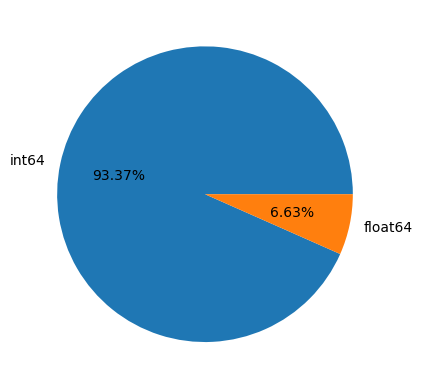

In [243]:
def pct(pct):
    return str(round(pct, 2)) + '%'
df.dtypes.value_counts().plot.pie(autopct=pct)

In [244]:
df.describe()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Cat_1,Date_1,Quan_1,Quan_2,Quan_3,Quan_4,Date_2,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quan_10,Quan_11,Quan_12,Quan_13,Quan_14,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_15,Cat_16,Quan_15,Cat_17,Cat_18,Cat_19,Cat_20,Cat_21,Cat_22,Cat_23,Cat_24,Cat_25,Cat_26,Cat_27,Cat_28,Cat_29,Cat_30,Cat_31,Cat_32,Cat_33,Cat_34,Cat_35,Cat_36,Cat_37,Cat_38,Cat_39,Cat_40,Cat_41,Cat_42,Cat_43,Cat_44,Cat_45,Cat_46,Cat_47,Cat_48,Cat_49,Cat_50,Cat_51,Cat_52,Cat_53,Cat_54,Cat_55,Cat_56,Cat_57,Cat_58,Cat_59,Cat_60,Cat_61,Cat_62,Cat_63,Cat_64,Cat_65,Cat_66,Cat_67,Cat_68,Cat_69,Cat_70,Cat_71,Cat_72,Cat_73,Cat_74,Cat_75,Cat_76,Cat_77,Cat_78,Cat_79,Cat_80,Cat_81,Cat_82,Cat_83,Cat_84,Cat_85,Cat_86,Cat_87,Cat_88,Cat_89,Cat_90,Cat_91,Cat_92,Cat_93,Cat_94,Cat_95,Cat_96,Cat_97,Cat_98,Cat_99,Cat_100,Cat_101,Cat_102,Cat_103,Cat_104,Cat_105,Cat_106,Cat_107,Cat_108,Cat_109,Quan_16,Quan_17,Quan_18,Cat_110,Cat_111,Cat_112,Cat_113,Cat_114,Cat_115,Cat_116,Cat_117,Cat_118,Cat_119,Cat_120,Cat_121,Cat_122,Cat_123,Cat_124,Cat_125,Cat_126,Cat_127,Cat_128,Cat_129,Cat_130,Cat_131,Cat_132,Cat_133,Cat_134,Cat_135,Cat_136,Cat_137,Cat_138,Cat_139,Cat_140,Cat_141,Cat_142,Cat_143,Cat_144,Cat_145,Cat_146,Cat_147,Cat_148,Cat_149,Cat_150,Cat_151,Cat_152,Cat_153,Cat_154,Cat_155,Cat_156,Cat_157,Cat_158,Cat_159,Cat_160,Cat_161,Cat_162,Cat_163,Cat_164,Cat_165,Cat_166,Cat_167,Cat_168,Cat_169,Cat_170,Cat_171,Cat_172,Cat_173,Cat_174,Cat_175,Cat_176,Cat_177,Cat_178,Cat_179,Cat_180,Cat_181,Cat_182,Cat_183,Cat_184,Cat_185,Cat_186,Cat_187,Cat_188,Cat_189,Cat_190,Cat_191,Cat_192,Cat_193,Cat_194,Cat_195,Cat_196,Cat_197,Cat_198,Cat_199,Cat_200,Cat_201,Cat_202,Cat_203,Cat_204,Cat_205,Cat_206,Cat_207,Cat_208,Cat_209,Cat_210,Cat_211,Cat_212,Cat_213,Cat_214,Cat_215,Cat_216,Cat_217,Cat_218,Cat_219,Cat_220,Cat_221,Cat_222,Cat_223,Cat_224,Cat_225,Cat_226,Cat_227,Cat_228,Cat_229,Cat_230,Cat_231,Cat_232,Cat_233,Cat_234,Cat_235,Cat_236,Cat_237,Cat_238,Cat_239,Cat_240,Cat_241,Cat_242,Cat_243,Cat_244,Cat_245,Cat_246,Cat_247,Cat_248,Cat_249,Cat_250,Cat_251,Cat_252,Cat_253,Cat_254,Cat_255,Cat_256,Cat_257,Cat_258,Cat_259,Cat_260,Cat_261,Cat_262,Cat_263,Cat_264,Cat_265,Cat_266,Cat_267,Cat_268,Cat_269,Cat_270,Cat_271,Cat_272,Cat_273,Cat_274,Cat_275,Cat_276,Cat_277,Cat_278,Cat_279,Cat_280,Cat_281,Cat_282,Cat_283,Cat_284,Cat_285,Cat_286,Cat_287,Cat_288,Cat_289,Cat_290,Cat_291,Cat_292,Cat_293,Cat_294,Cat_295,Cat_296,Cat_297,Cat_298,Cat_299,Cat_300,Cat_301,Cat_302,Cat_303,Cat_304,Cat_305,Cat_306,Cat_307,Cat_308,Cat_309,Cat_310,Cat_311,Cat_312,Cat_313,Cat_314,Cat_315,Cat_316,Cat_317,Cat_318,Cat_319,Cat_320,Cat_321,Cat_322,Cat_323,Cat_324,Cat_325,Cat_326,Cat_327,Cat_328,Cat_329,Cat_330,Cat_331,Cat_332,Cat_333,Cat_334,Cat_335,Cat_336,Cat_337,Cat_338,Cat_339,Cat_340,Cat_341,Cat_342,Cat_343,Cat_344,Cat_345,Cat_346,Cat_347,Cat_348,Cat_349,Cat_350,Cat_351,Cat_352,Cat_353,Cat_354,Cat_355,Cat_356,Cat_357,Cat_358,Cat_359,Cat_360,Cat_361,Cat_362,Cat_363,Cat_364,Cat_365,Cat_366,Cat_367,Cat_368,Cat_369,Cat_370,Cat_371,Cat_372,Cat_373,Cat_374,Cat_375,Cat_376,Cat_377,Cat_378,Cat_379,Cat_380,Cat_381,Quan_19,Cat_382,Cat_383,Cat_384,Quan_20,Cat_385,Cat_386,Cat_387,Cat_388,Cat_389,Cat_390,Cat_391,Quan_21,Cat_392,Cat_393,Cat_394,Cat_395,Cat_396,Quan_22,Cat_397,Cat_398,Cat_399,Cat_400,Cat_401,Cat_402,Cat_403,Cat_404,Cat_405,Cat_406,Cat_407,Cat_408,Cat_409,Cat_410,Cat_411,Cat_412,Cat_413,Cat_414,Cat_415,Cat_416,Cat_417,Cat_418,Cat_419,Cat_420,Cat_421,Cat_422,Cat_423,Cat_424,Cat_425,Cat_426,Cat_427,Cat_428,Cat_429,Cat_430,Cat_431,Cat_432,Cat_433,Cat_434,Cat_435,Cat_436,Cat_437,Cat_438,Cat_439,Cat_440,Cat_441,Cat_442,Cat_443,Cat_444,Cat_445,Cat_446,Cat_447,Cat_448,Cat_449,Cat_450,Cat_451,Cat_452,Cat_453,Cat_454,Cat_455,Cat_456,Cat_457,Quant_22,Cat_458,Quant_23,Cat_459,Quant_24,Cat_460,Quant_25,Cat_461,Cat_462,Cat_463,Cat_464,Cat_465,Cat_466,Cat_467,Cat_468,Cat_469,Cat_470,Ca

Nous allons à présent procéder à l'identification des valeurs manquantes.

#### Identification du variables cible:

Nous disposons de 12 variables cibles, correspondant aux colonnes nommées "outcome" de M1 à M12.









In [17]:
pd.set_option('display.max_columns',559)

In [18]:
df.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Cat_1,Date_1,Quan_1,Quan_2,Quan_3,Quan_4,Date_2,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quan_10,Quan_11,Quan_12,Quan_13,Quan_14,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_15,Cat_16,Quan_15,Cat_17,Cat_18,Cat_19,Cat_20,Cat_21,Cat_22,Cat_23,Cat_24,Cat_25,Cat_26,Cat_27,Cat_28,Cat_29,Cat_30,Cat_31,Cat_32,Cat_33,Cat_34,Cat_35,Cat_36,Cat_37,Cat_38,Cat_39,Cat_40,Cat_41,Cat_42,Cat_43,Cat_44,Cat_45,Cat_46,Cat_47,Cat_48,Cat_49,Cat_50,Cat_51,Cat_52,Cat_53,Cat_54,Cat_55,Cat_56,Cat_57,Cat_58,Cat_59,Cat_60,Cat_61,Cat_62,Cat_63,Cat_64,Cat_65,Cat_66,Cat_67,Cat_68,Cat_69,Cat_70,Cat_71,Cat_72,Cat_73,Cat_74,Cat_75,Cat_76,Cat_77,Cat_78,Cat_79,Cat_80,Cat_81,Cat_82,Cat_83,Cat_84,Cat_85,Cat_86,Cat_87,Cat_88,Cat_89,Cat_90,Cat_91,Cat_92,Cat_93,Cat_94,Cat_95,Cat_96,Cat_97,Cat_98,Cat_99,Cat_100,Cat_101,Cat_102,Cat_103,Cat_104,Cat_105,Cat_106,Cat_107,Cat_108,Cat_109,Quan_16,Quan_17,Quan_18,Cat_110,Cat_111,Cat_112,Cat_113,Cat_114,Cat_115,Cat_116,Cat_117,Cat_118,Cat_119,Cat_120,Cat_121,Cat_122,Cat_123,Cat_124,Cat_125,Cat_126,Cat_127,Cat_128,Cat_129,Cat_130,Cat_131,Cat_132,Cat_133,Cat_134,Cat_135,Cat_136,Cat_137,Cat_138,Cat_139,Cat_140,Cat_141,Cat_142,Cat_143,Cat_144,Cat_145,Cat_146,Cat_147,Cat_148,Cat_149,Cat_150,Cat_151,Cat_152,Cat_153,Cat_154,Cat_155,Cat_156,Cat_157,Cat_158,Cat_159,Cat_160,Cat_161,Cat_162,Cat_163,Cat_164,Cat_165,Cat_166,Cat_167,Cat_168,Cat_169,Cat_170,Cat_171,Cat_172,Cat_173,Cat_174,Cat_175,Cat_176,Cat_177,Cat_178,Cat_179,Cat_180,Cat_181,Cat_182,Cat_183,Cat_184,Cat_185,Cat_186,Cat_187,Cat_188,Cat_189,Cat_190,Cat_191,Cat_192,Cat_193,Cat_194,Cat_195,Cat_196,Cat_197,Cat_198,Cat_199,Cat_200,Cat_201,Cat_202,Cat_203,Cat_204,Cat_205,Cat_206,Cat_207,Cat_208,Cat_209,Cat_210,Cat_211,Cat_212,Cat_213,Cat_214,Cat_215,Cat_216,Cat_217,Cat_218,Cat_219,Cat_220,Cat_221,Cat_222,Cat_223,Cat_224,Cat_225,Cat_226,Cat_227,Cat_228,Cat_229,Cat_230,Cat_231,Cat_232,Cat_233,Cat_234,Cat_235,Cat_236,Cat_237,Cat_238,Cat_239,Cat_240,Cat_241,Cat_242,Cat_243,Cat_244,Cat_245,Cat_246,Cat_247,Cat_248,Cat_249,Cat_250,Cat_251,Cat_252,Cat_253,Cat_254,Cat_255,Cat_256,Cat_257,Cat_258,Cat_259,Cat_260,Cat_261,Cat_262,Cat_263,Cat_264,Cat_265,Cat_266,Cat_267,Cat_268,Cat_269,Cat_270,Cat_271,Cat_272,Cat_273,Cat_274,Cat_275,Cat_276,Cat_277,Cat_278,Cat_279,Cat_280,Cat_281,Cat_282,Cat_283,Cat_284,Cat_285,Cat_286,Cat_287,Cat_288,Cat_289,Cat_290,Cat_291,Cat_292,Cat_293,Cat_294,Cat_295,Cat_296,Cat_297,Cat_298,Cat_299,Cat_300,Cat_301,Cat_302,Cat_303,Cat_304,Cat_305,Cat_306,Cat_307,Cat_308,Cat_309,Cat_310,Cat_311,Cat_312,Cat_313,Cat_314,Cat_315,Cat_316,Cat_317,Cat_318,Cat_319,Cat_320,Cat_321,Cat_322,Cat_323,Cat_324,Cat_325,Cat_326,Cat_327,Cat_328,Cat_329,Cat_330,Cat_331,Cat_332,Cat_333,Cat_334,Cat_335,Cat_336,Cat_337,Cat_338,Cat_339,Cat_340,Cat_341,Cat_342,Cat_343,Cat_344,Cat_345,Cat_346,Cat_347,Cat_348,Cat_349,Cat_350,Cat_351,Cat_352,Cat_353,Cat_354,Cat_355,Cat_356,Cat_357,Cat_358,Cat_359,Cat_360,Cat_361,Cat_362,Cat_363,Cat_364,Cat_365,Cat_366,Cat_367,Cat_368,Cat_369,Cat_370,Cat_371,Cat_372,Cat_373,Cat_374,Cat_375,Cat_376,Cat_377,Cat_378,Cat_379,Cat_380,Cat_381,Quan_19,Cat_382,Cat_383,Cat_384,Quan_20,Cat_385,Cat_386,Cat_387,Cat_388,Cat_389,Cat_390,Cat_391,Quan_21,Cat_392,Cat_393,Cat_394,Cat_395,Cat_396,Quan_22,Cat_397,Cat_398,Cat_399,Cat_400,Cat_401,Cat_402,Cat_403,Cat_404,Cat_405,Cat_406,Cat_407,Cat_408,Cat_409,Cat_410,Cat_411,Cat_412,Cat_413,Cat_414,Cat_415,Cat_416,Cat_417,Cat_418,Cat_419,Cat_420,Cat_421,Cat_422,Cat_423,Cat_424,Cat_425,Cat_426,Cat_427,Cat_428,Cat_429,Cat_430,Cat_431,Cat_432,Cat_433,Cat_434,Cat_435,Cat_436,Cat_437,Cat_438,Cat_439,Cat_440,Cat_441,Cat_442,Cat_443,Cat_444,Cat_445,Cat_446,Cat_447,Cat_448,Cat_449,Cat_450,Cat_451,Cat_452,Cat_453,Cat_454,Cat_455,Cat_456,Cat_457,Quant_22,Cat_458,Quant_23,Cat_459,Quant_24,Cat_460,Quant_25,Cat_461,Cat_462,Cat_463,Cat_464,Cat_465,Cat_466,Cat_467,Cat_468,Cat_469,Cat_470,Ca

#### Analyse de valeurs manquante :

<Axes: >

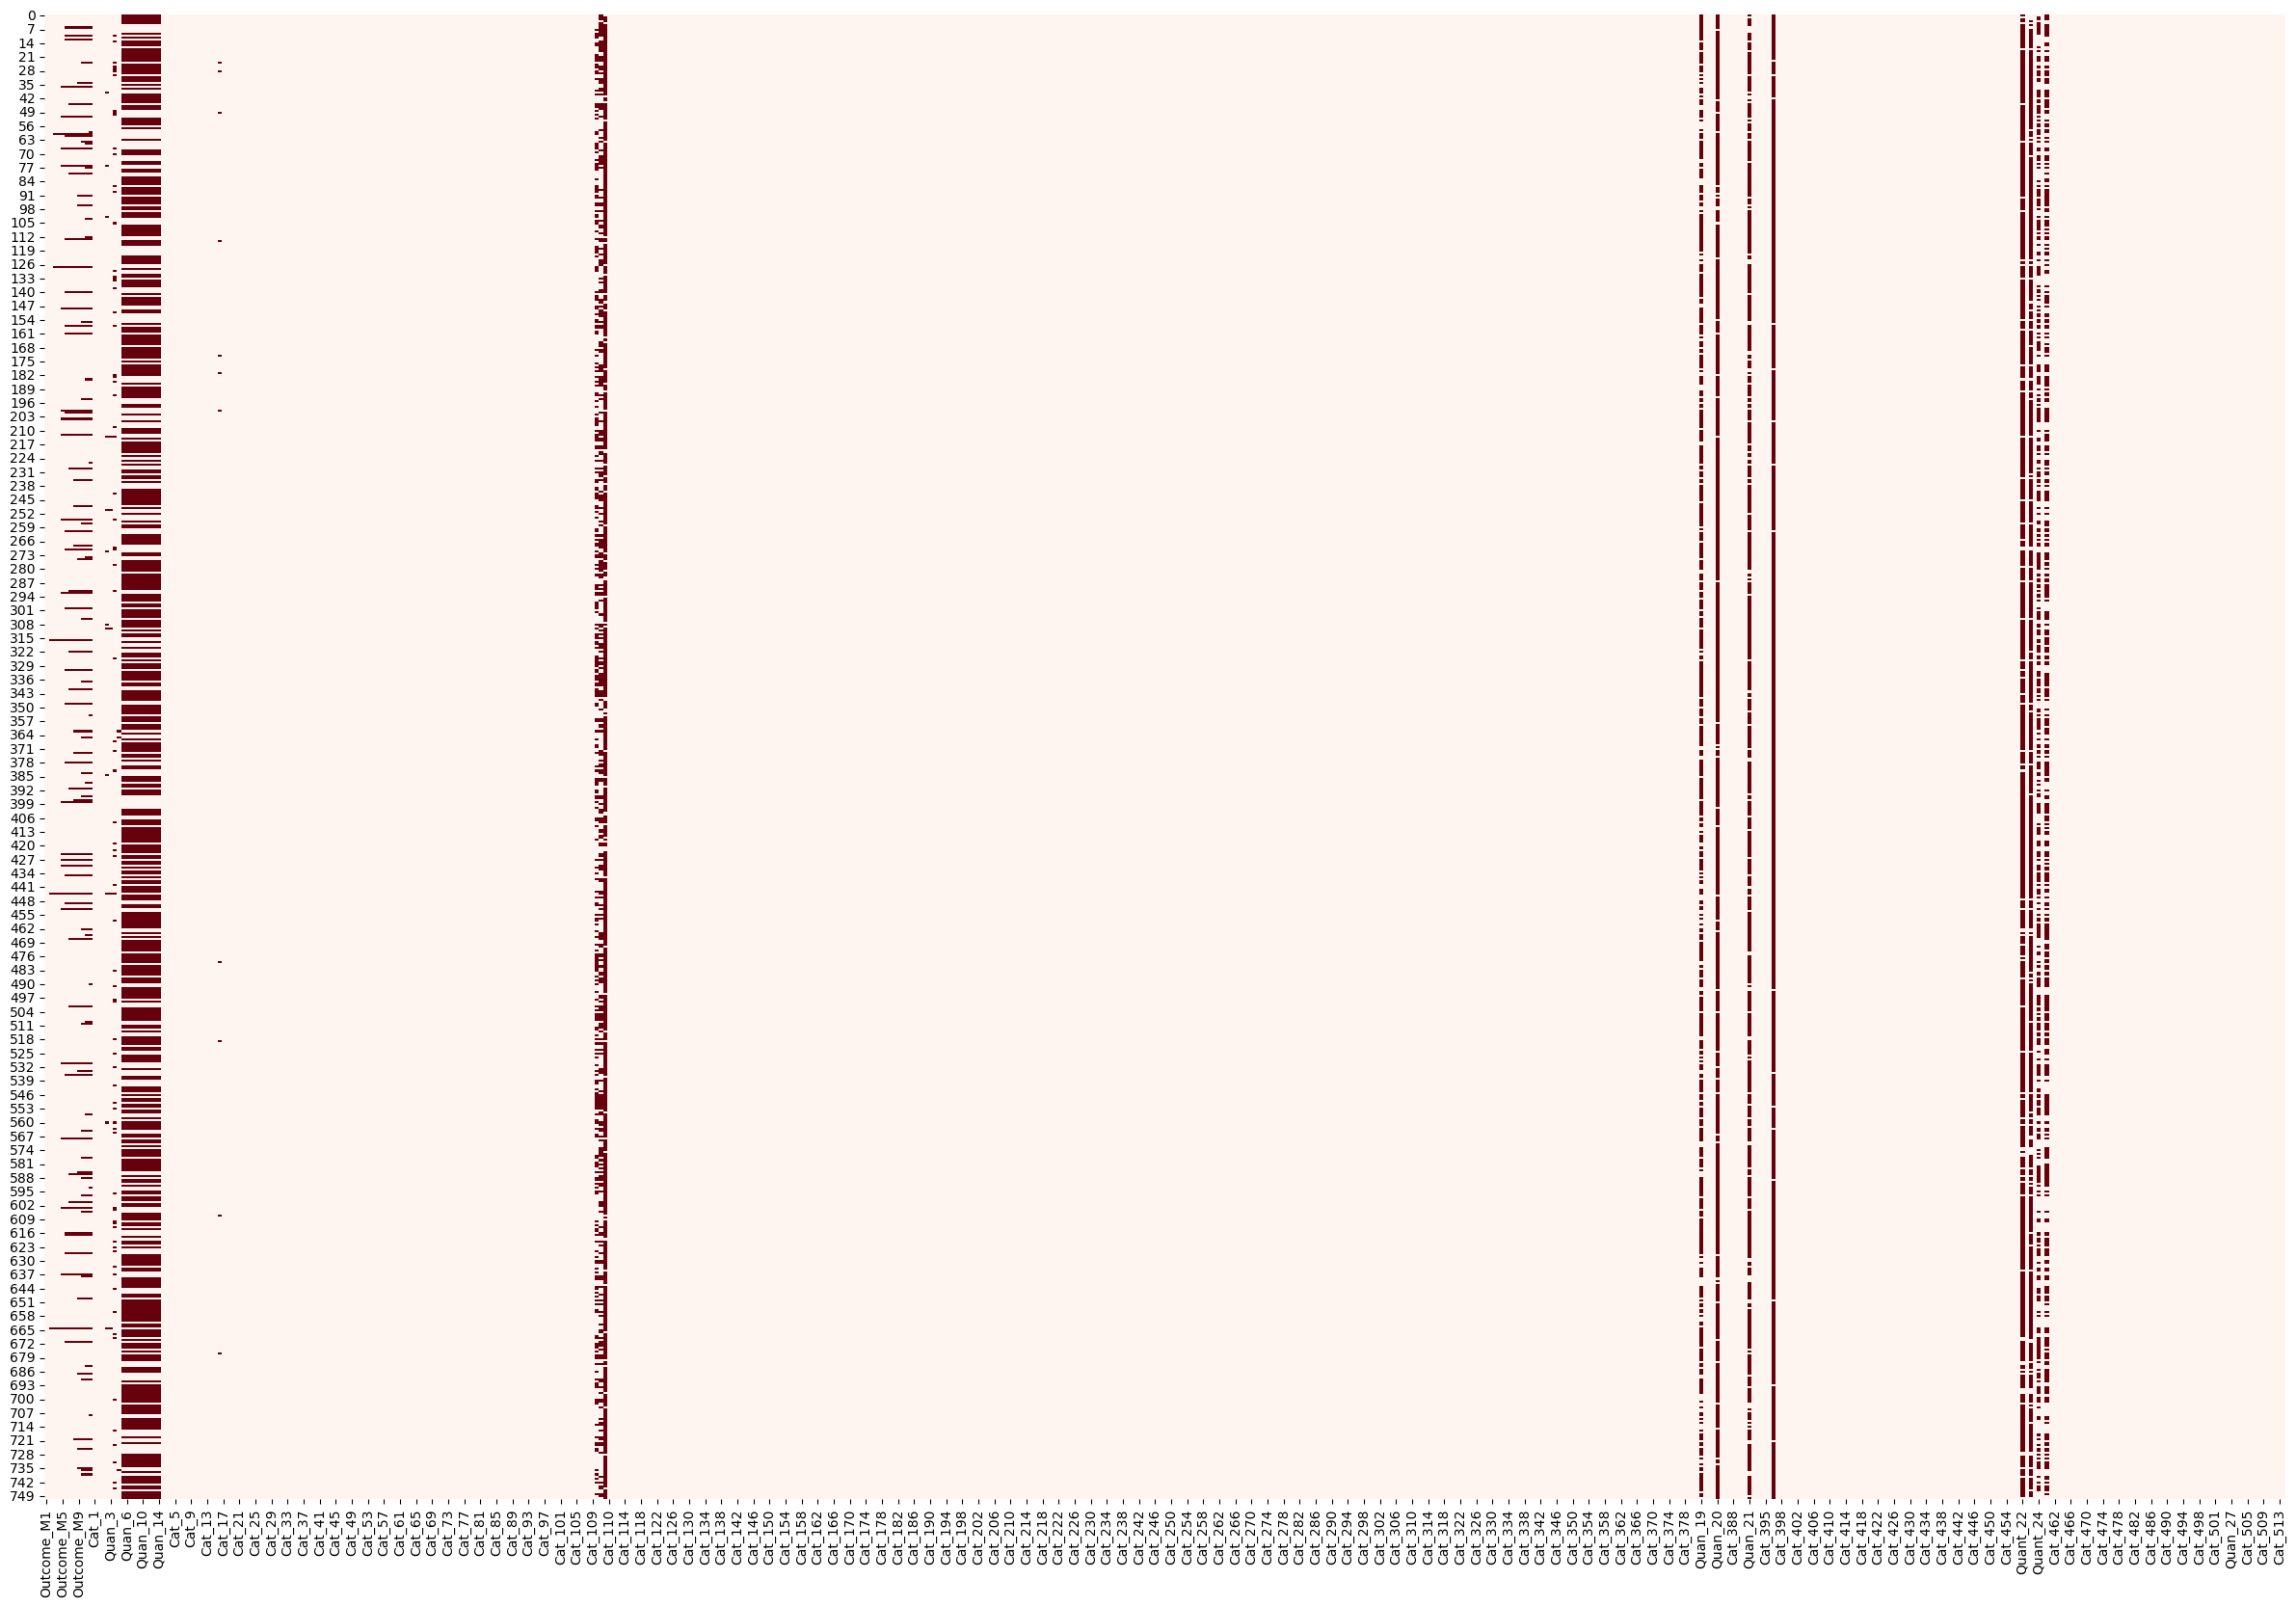

In [22]:
plt.figure(figsize=(30,20))
sns.heatmap(df.isna(),cmap='Reds',cbar=False)

Il est à noter la présence de nombreuses valeurs manquantes dans les colonnes de type quantitatif.

In [24]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True).tail(50)

Cat_162        0.000000
Cat_170        0.000000
Cat_160        0.000000
Cat_153        0.000000
Cat_154        0.000000
Cat_155        0.000000
Cat_156        0.000000
Cat_152        0.000000
Cat_151        0.000000
Cat_158        0.000000
Cat_159        0.000000
Cat_157        0.000000
Cat_161        0.000000
Outcome_M2     0.003995
Date_2         0.003995
Quan_3         0.006658
Outcome_M3     0.006658
Outcome_M4     0.006658
Quan_15        0.014647
Quan_2         0.015979
Outcome_M5     0.031957
Outcome_M6     0.061252
Outcome_M7     0.075899
Outcome_M8     0.085220
Outcome_M9     0.098535
Quan_4         0.105193
Outcome_M10    0.126498
Outcome_M11    0.141145
Outcome_M12    0.149134
Quan_16        0.410120
Quan_17        0.435419
Quant_24       0.541944
Quant_25       0.583222
Quan_13        0.631158
Quan_5         0.631158
Quan_6         0.631158
Quan_7         0.631158
Quan_8         0.631158
Quan_9         0.631158
Quan_10        0.631158
Quan_12        0.631158
Quan_14        0

Certaines données présentent des lacunes significatives, notamment dans les variables Quant_23, Quant_22, Quant_20 et Quant_22, où plus de 90 % des valeurs sont manquantes.

Il serait judicieux de supprimer les colonnes affichant plus de 90 % de valeurs manquantes, car avec seulement 1 % de données, elles apportent peu d'informations significatives.

In [30]:
df =df[df.columns[df.isna().sum()/df.shape[0]< 0.9]]

In [33]:
df.shape

(751, 554)

In [35]:
cat= df.columns[df.columns.str.contains("Cat")]
out= df.columns[df.columns.str.contains("Out")]
quan= df.columns[df.columns.str.contains("Quan")]
date= df.columns[df.columns.str.contains("Date")]

### Analyse du Fond:

#### Visualisation du target :

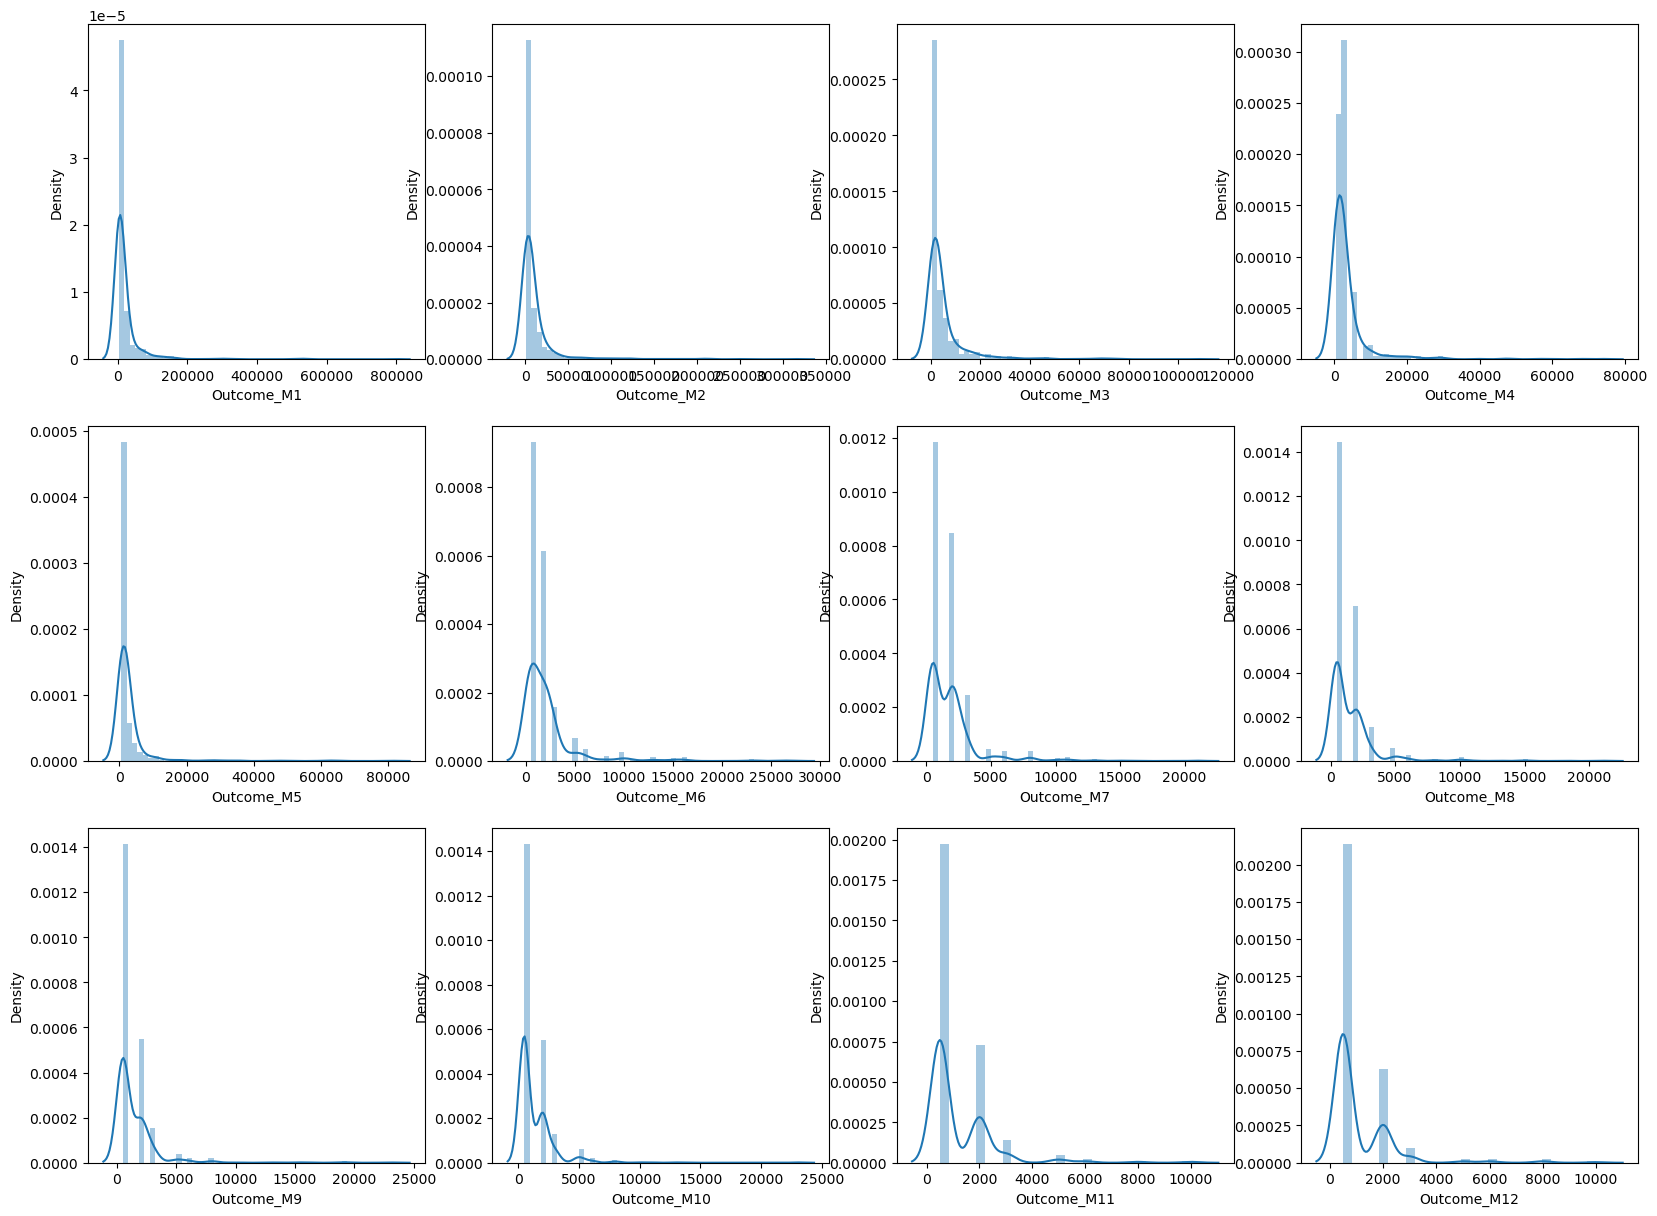

In [36]:
i=1
plt.figure(figsize=(20,20))
for col in out:
    plt.subplot(4,4, i)
    sns.distplot(df[col])
    i += 1
plt.show()

Il est notable que toutes les distributions des graphiques présentent une asymétrie. De plus, les graphiques semblent tous présenter une similarité marquée.

#### Analyse des variables caractéristiques :

##### Analyse du variables quantitatives :

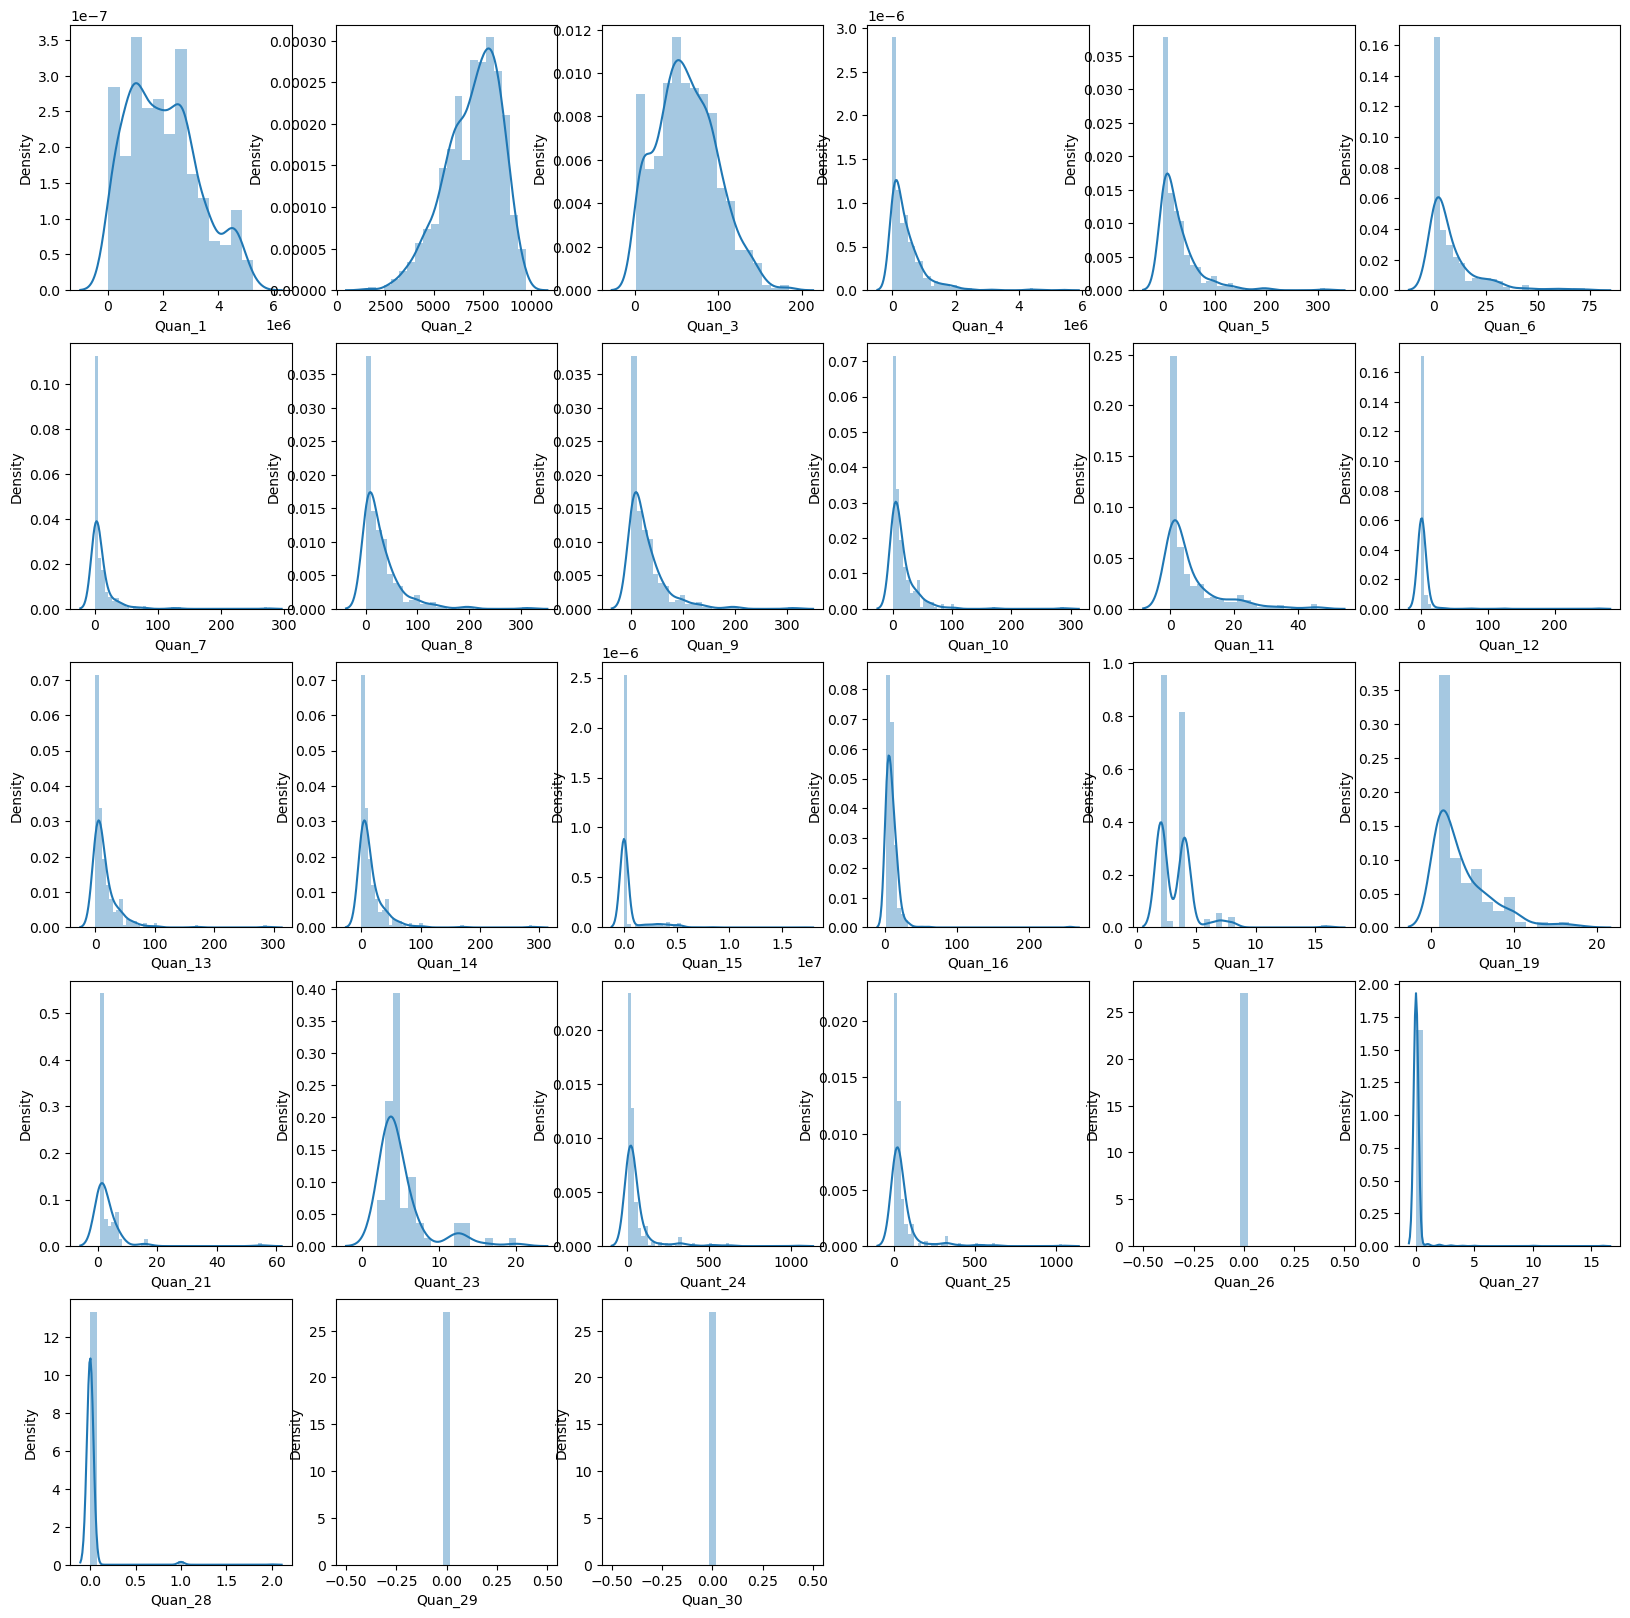

In [45]:
i=1
plt.figure(figsize=(20,20))
for col in quan:
    plt.subplot(5,6, i)
    sns.distplot(df[col])
    i += 1
plt.show()

Il  est à noter que certaines variables sur les graphiques "Quant_26", "Quant_29" et "Quant_30" demeurent constantes, tandis que les autres semblent presque uniformes, avec des valeurs très proches de zéro.

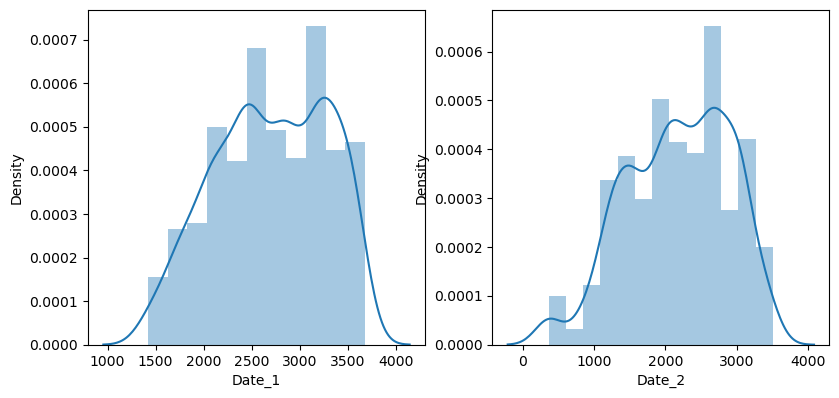

In [44]:
i=1
plt.figure(figsize=(20,20))
for col in date:
    plt.subplot(4,4, i)
    sns.distplot(df[col])
    i += 1
plt.show()

Les deux graphiques semblent assez similaires, avec la majorité des chiffres concentrés autour des valeurs 1500 et 3000.

##### Analyse du variables qualitatives :

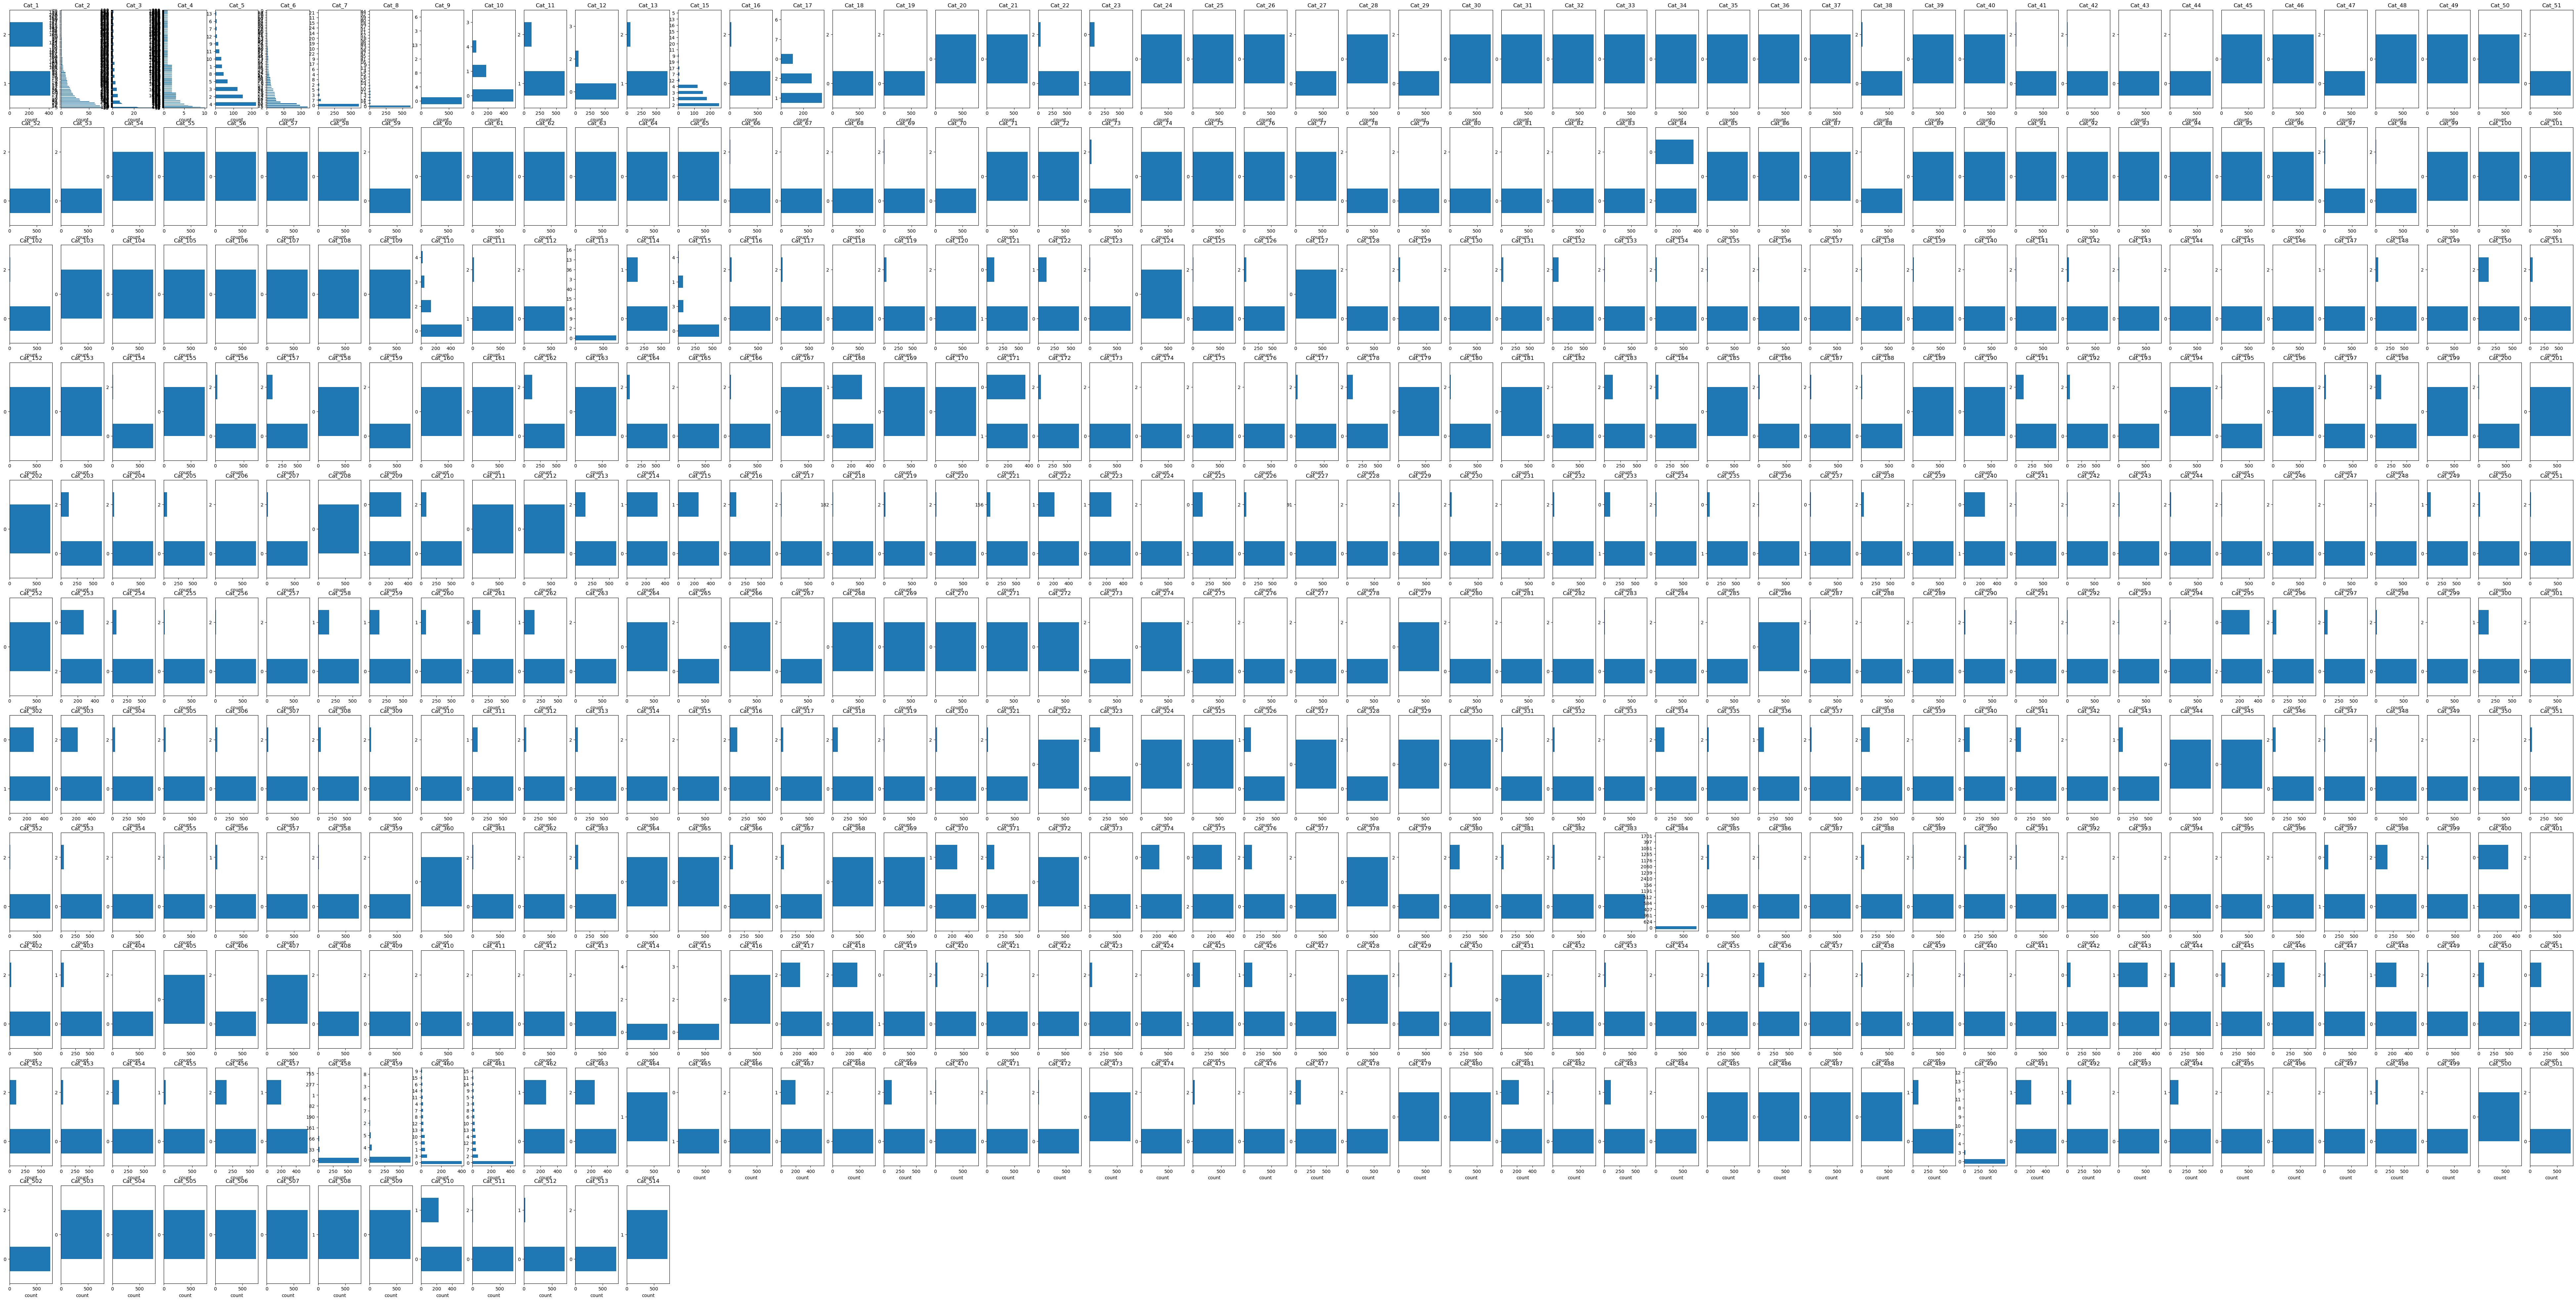

In [56]:
i=1
plt.figure(figsize=(100,50))
for col in cat:
    plt.subplot(11,50,i)
    df[col].value_counts().plot(kind="barh")
    plt.xlabel("count"),
    plt.title(col)
    i += 1
plt.show()


Il est observé que dans toutes les catégories, le nombre de variables encodées en zéros est systématiquement supérieur à celui des variables encodées en deux.

### PRE-PROCESSING:

In [246]:
trainset, testset = train_test_split(df, test_size =0.2, random_state=0)

In [145]:
from sklearn.model_selection import train_test_split

In [147]:
def imputation(df):
 
    df[cat].fillna(df[cat].mode(axis=0), inplace=True)
    df[date]=df[date].fillna(0)
    df[quan]=df[quan].fillna(df[quan].mean(axis=0))
    df=df.dropna(subset=out)
    
    return df

In [148]:
df.head(2)


,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Cat_1,Date_1,Quan_1,Quan_2,Quan_3,Quan_4,Date_2,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quan_10,Quan_11,Quan_12,Quan_13,Quan_14,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_15,Cat_16,Quan_15,Cat_17,Cat_18,Cat_19,Cat_20,Cat_21,Cat_22,Cat_23,Cat_24,Cat_25,Cat_26,Cat_27,Cat_28,Cat_29,Cat_30,Cat_31,Cat_32,Cat_33,Cat_34,Cat_35,Cat_36,Cat_37,Cat_38,Cat_39,Cat_40,Cat_41,Cat_42,Cat_43,Cat_44,Cat_45,Cat_46,Cat_47,Cat_48,Cat_49,Cat_50,Cat_51,Cat_52,Cat_53,Cat_54,Cat_55,Cat_56,Cat_57,Cat_58,Cat_59,Cat_60,Cat_61,Cat_62,Cat_63,Cat_64,Cat_65,Cat_66,Cat_67,Cat_68,Cat_69,Cat_70,Cat_71,Cat_72,Cat_73,Cat_74,Cat_75,Cat_76,Cat_77,Cat_78,Cat_79,Cat_80,Cat_81,Cat_82,Cat_83,Cat_84,Cat_85,Cat_86,Cat_87,Cat_88,Cat_89,Cat_90,Cat_91,Cat_92,Cat_93,Cat_94,Cat_95,Cat_96,Cat_97,Cat_98,Cat_99,Cat_100,Cat_101,Cat_102,Cat_103,Cat_104,Cat_105,Cat_106,Cat_107,Cat_108,Cat_109,Quan_16,Quan_17,Cat_110,Cat_111,Cat_112,Cat_113,Cat_114,Cat_115,Cat_116,Cat_117,Cat_118,Cat_119,Cat_120,Cat_121,Cat_122,Cat_123,Cat_124,Cat_125,Cat_126,Cat_127,Cat_128,Cat_129,Cat_130,Cat_131,Cat_132,Cat_133,Cat_134,Cat_135,Cat_136,Cat_137,Cat_138,Cat_139,Cat_140,Cat_141,Cat_142,Cat_143,Cat_144,Cat_145,Cat_146,Cat_147,Cat_148,Cat_149,Cat_150,Cat_151,Cat_152,Cat_153,Cat_154,Cat_155,Cat_156,Cat_157,Cat_158,Cat_159,Cat_160,Cat_161,Cat_162,Cat_163,Cat_164,Cat_165,Cat_166,Cat_167,Cat_168,Cat_169,Cat_170,Cat_171,Cat_172,Cat_173,Cat_174,Cat_175,Cat_176,Cat_177,Cat_178,Cat_179,Cat_180,Cat_181,Cat_182,Cat_183,Cat_184,Cat_185,Cat_186,Cat_187,Cat_188,Cat_189,Cat_190,Cat_191,Cat_192,Cat_193,Cat_194,Cat_195,Cat_196,Cat_197,Cat_198,Cat_199,Cat_200,Cat_201,Cat_202,Cat_203,Cat_204,Cat_205,Cat_206,Cat_207,Cat_208,Cat_209,Cat_210,Cat_211,Cat_212,Cat_213,Cat_214,Cat_215,Cat_216,Cat_217,Cat_218,Cat_219,Cat_220,Cat_221,Cat_222,Cat_223,Cat_224,Cat_225,Cat_226,Cat_227,Cat_228,Cat_229,Cat_230,Cat_231,Cat_232,Cat_233,Cat_234,Cat_235,Cat_236,Cat_237,Cat_238,Cat_239,Cat_240,Cat_241,Cat_242,Cat_243,Cat_244,Cat_245,Cat_246,Cat_247,Cat_248,Cat_249,Cat_250,Cat_251,Cat_252,Cat_253,Cat_254,Cat_255,Cat_256,Cat_257,Cat_258,Cat_259,Cat_260,Cat_261,Cat_262,Cat_263,Cat_264,Cat_265,Cat_266,Cat_267,Cat_268,Cat_269,Cat_270,Cat_271,Cat_272,Cat_273,Cat_274,Cat_275,Cat_276,Cat_277,Cat_278,Cat_279,Cat_280,Cat_281,Cat_282,Cat_283,Cat_284,Cat_285,Cat_286,Cat_287,Cat_288,Cat_289,Cat_290,Cat_291,Cat_292,Cat_293,Cat_294,Cat_295,Cat_296,Cat_297,Cat_298,Cat_299,Cat_300,Cat_301,Cat_302,Cat_303,Cat_304,Cat_305,Cat_306,Cat_307,Cat_308,Cat_309,Cat_310,Cat_311,Cat_312,Cat_313,Cat_314,Cat_315,Cat_316,Cat_317,Cat_318,Cat_319,Cat_320,Cat_321,Cat_322,Cat_323,Cat_324,Cat_325,Cat_326,Cat_327,Cat_328,Cat_329,Cat_330,Cat_331,Cat_332,Cat_333,Cat_334,Cat_335,Cat_336,Cat_337,Cat_338,Cat_339,Cat_340,Cat_341,Cat_342,Cat_343,Cat_344,Cat_345,Cat_346,Cat_347,Cat_348,Cat_349,Cat_350,Cat_351,Cat_352,Cat_353,Cat_354,Cat_355,Cat_356,Cat_357,Cat_358,Cat_359,Cat_360,Cat_361,Cat_362,Cat_363,Cat_364,Cat_365,Cat_366,Cat_367,Cat_368,Cat_369,Cat_370,Cat_371,Cat_372,Cat_373,Cat_374,Cat_375,Cat_376,Cat_377,Cat_378,Cat_379,Cat_380,Cat_381,Quan_19,Cat_382,Cat_383,Cat_384,Cat_385,Cat_386,Cat_387,Cat_388,Cat_389,Cat_390,Cat_391,Quan_21,Cat_392,Cat_393,Cat_394,Cat_395,Cat_396,Cat_397,Cat_398,Cat_399,Cat_400,Cat_401,Cat_402,Cat_403,Cat_404,Cat_405,Cat_406,Cat_407,Cat_408,Cat_409,Cat_410,Cat_411,Cat_412,Cat_413,Cat_414,Cat_415,Cat_416,Cat_417,Cat_418,Cat_419,Cat_420,Cat_421,Cat_422,Cat_423,Cat_424,Cat_425,Cat_426,Cat_427,Cat_428,Cat_429,Cat_430,Cat_431,Cat_432,Cat_433,Cat_434,Cat_435,Cat_436,Cat_437,Cat_438,Cat_439,Cat_440,Cat_441,Cat_442,Cat_443,Cat_444,Cat_445,Cat_446,Cat_447,Cat_448,Cat_449,Cat_450,Cat_451,Cat_452,Cat_453,Cat_454,Cat_455,Cat_456,Cat_457,Cat_458,Quant_23,Cat_459,Quant_24,Cat_460,Quant_25,Cat_461,Cat_462,Cat_463,Cat_464,Cat_465,Cat_466,Cat_467,Cat_468,Cat_469,Cat_470,Cat_471,Cat_472,Cat_473,Cat_474,Cat

def preprocessing(df):
    df = imputation(df)
    
    X = df.drop(columns=out)
    y = df[out]
    
    print(y.value_counts())
    
    return X,y

In [248]:
X_train , y_train=preprocessing(trainset)

Outcome_M1  Outcome_M2  Outcome_M3  Outcome_M4  Outcome_M5  Outcome_M6  Outcome_M7  Outcome_M8  Outcome_M9  Outcome_M10  Outcome_M11  Outcome_M12
2000        500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0          45
            2000.0      500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0          19
            500.0       2000.0      500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0           8
3000        500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0           7
2000        2000.0      500.0       2000.0      500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0           6
                                                                                              

In [247]:
X_test , y_test=preprocessing(testset)

Outcome_M1  Outcome_M2  Outcome_M3  Outcome_M4  Outcome_M5  Outcome_M6  Outcome_M7  Outcome_M8  Outcome_M9  Outcome_M10  Outcome_M11  Outcome_M12
2000        500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0          9
            2000.0      500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0          2
                        3000.0      2000.0      2000.0      2000.0      2000.0      500.0       500.0       500.0        500.0        500.0          2
3000        500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0       500.0        500.0        500.0          2
2000        500.0       500.0       500.0       2000.0      500.0       500.0       500.0       500.0       500.0        500.0        500.0          2
                                                                                                   

### Modelisation :


In [221]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [222]:
preprocessor = make_pipeline(PolynomialFeatures(2 , include_bias=False),SelectKBest(f_classif,k=10))

In [223]:
RandomForest =make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostRegressor(random_state=0))
SVM =make_pipeline(preprocessor, StandardScaler(),SVC(random_state=0))


In [224]:
list_of_models =[RandomForest, AdaBoost,SVM]

### Procedure d'evaluation :

In [225]:
model = RandomForestRegressor(random_state = 1234)

# Fit model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test.fillna(0))

# Measure model performance
mean_squared_log_error(y_test, preds, squared=False)

0.36991271311040647

In [236]:
def evaluation(model):
        if isinstance(model, SelectKBest):  
            model.fit(X_train, y_train) 
        regr = MultiOutputRegressor(model).fit(X_train, y_train)
        ypred = regr.predict(X_test)  
        N, train_score, val_score = learning_curve(regr, X_train, y_train, cv=4)  
        return ypred

In [237]:
for model in list_of_models:
    ypred=evaluation(model)

    # Measure model performance
    print(mean_squared_log_error(y_test, ypred, squared=False))

1.0059139811302866
1.031450031742972
1.0583622327183195


## II - CONCLUSION :

D'après l'ensemble de nos analyses et de toutes les étapes que nous avons entreprises, il ressort que le meilleur modèle est le RandomForest.